# PBS 111 Final

March 8, 2021

In [74]:
library(car)
library(ez)
library(tidyr)
library(nlme)
library(lme4)
library(lmerTest)
library(lattice)
library(MASS)
library(plyr)
library(dplyr)
library(psych)

#### 1.) I enclosed a file labeled “psych_rank.csv”. It contains the data from a Chronicle of Higher Education rating of top departments in a number of fields. We, of course, were in the top 10. I deleted one derived score to avoid confusion. The far left column is the department’s rank, note that two schools are tied for 10th. Develop a model to explain or predict the ranking. Are there interesting relationships among the variables or schools? Do the Ivy League schools differ from the others? It’s not correct but treat the ranks as a continuous variable. There might be a number of different analyses that would help us understand these data.

In [8]:
psych_rank = read.csv('data_files//psych_rank.csv')
dim(psych_rank)
psych_rank

# eliminate institute name
dat_rank = psych_rank[,2:15]

[1] 11 15

institute,rank,num_fac,probbook,booksper,probjour,jourper,probcite,numcites,citesper,probnewg,new_gran,grantdol,probawd,awards_p
Harvard U.,1,23,26,0.70,96,11.91,96,70.30,5.90,87,2.30,742464,13,0.13
Yale U.,2,57,19,0.68,86,7.33,82,38.72,5.28,44,1.70,774609,7,0.07
Carnegie Mellon U.,3,30,23,0.57,87,5.97,77,31.07,5.21,63,2.20,1334717,3,0.03
Washington U. in St. Louis,4,32,13,0.13,94,6.25,88,37.81,6.05,47,1.19,372599,3,0.06
U. of Pennsylvania,5,63,0,0.00,97,7.22,95,39.32,5.44,57,1.83,708448,3,0.03
U. of Wisconsin at Madison,6,98,4,0.07,77,4.90,66,34.35,7.01,45,1.69,749611,4,0.04
Dartmouth College,7,19,11,0.16,95,6.16,95,36.68,5.96,58,1.79,657506,0,0.00
Emory U.,8,56,7,0.11,73,5.71,64,28.88,5.05,32,1.18,484033,2,0.02
Columbia U.,9,24,0,0.00,83,5.96,79,44.04,7.39,71,2.25,753668,0,0.00
Duke U.,10,21,5,0.05,81,4.76,71,35.19,7.39,52,1.71,565984,0,0.00


Here we can see that the matrix is underdetermined, and there are more predictor variables than there are observations. To converge on a solution, we will need to reduce the number of variables. Many of these are likely highly colinear because there are multiple measurements of publishing books and journals, getting citations, getting new grants and receiving awards. Let's look at the correlation matrix to decide on a subset of predictor variables.

In [13]:
cor(dat_rank)

,rank,num_fac,probbook,booksper,probjour,jourper,probcite,numcites,citesper,probnewg,new_gran,grantdol,probawd,awards_p
rank,1.000000000,0.008655232,-0.8058651,-0.8228503,-0.53395104,-0.71878271,-0.45477348,-0.55479945,0.3437992,-0.2471256,-0.1299385,-0.34260439,-0.83379879,-0.860170268
num_fac,0.008655232,1.000000000,-0.3538601,-0.2111003,-0.42142428,-0.27863718,-0.41447067,-0.36361168,-0.1697728,-0.5107870,-0.2822659,-0.02756589,0.04461223,0.007955309
probbook,-0.805865121,-0.353860093,1.0000000,0.9391232,0.35714035,0.63399638,0.29719566,0.47252805,-0.3562812,0.3190317,0.2084063,0.40727845,0.71427394,0.722164143
booksper,-0.822850287,-0.211100283,0.9391232,1.0000000,0.27918573,0.66947437,0.25695479,0.49686817,-0.3678830,0.3258089,0.3277796,0.49715677,0.78097432,0.737355493
probjour,-0.533951036,-0.421424277,0.3571403,0.2791857,1.00000000,0.59532832,0.96900626,0.52247513,-0.1704582,0.5436718,0.2695115,0.04944075,0.34286614,0.404051938
jourper,-0.718782705,-0.278637184,0.6339964,0.6694744,0.59532832,1.00000000,0.63902493,0.90934360,-0.2028500,0.6362481,0.3802291,0.07646032,0.88396805,0.855909701
probcite,-0.454773485,-0.414470670,0.2971957,0.2569548,0.96900626,0.63902493,1.00000000,0.55474555,-0.2093803,0.5833311,0.3185780,-0.01634891,0.34132348,0.378429196
numcites,-0.554799453,-0.363611684,0.4725280,0.4968682,0.52247513,0.90934360,0.55474555,1.00000000,0.2200185,0.7231094,0.4425545,-0.01012816,0.78371799,0.763088265
citesper,0.343799214,-0.169772752,-0.3562812,-0.3678830,-0.17045820,-0.20285003,-0.20938027,0.22001855,1.0000000,0.1698641,0.1265363,-0.19187780,-0.19781667,-0.186819886
probnewg,-0.247125579,-0.510787018,0.3190317,0.3258089,0.54367183,0.63624811,0.58333111,0.72310937,0.1698641,1.0000000,0.8696557,0.38218084,0.39193243,0.338108241


From this correlation matrix we can see a few things. (1) the number of faculty is not nearly as correlated with rank as all the other predictors. (2) probbook and booksper have a correlation of 0.94, so I will only keep booksper, since it has a slightly better correlation with rank. (3) probjour and jourper are somewhat highly correlated (0.60), and probjour correlates with probcite at 0.97. Meanwhile, jourper correlates with numcites at 0.91. Of these 4 variables I will only keep probcite and numcites, since these 2 are less correlated with each other than are probjour and jourper, but 'represent' all 4 variables in terms of correlation (4) citesper is relatively uncorrelated with other predictors, so I will keep it. (5) Probnewg and newgran are highly correlated, but probnewg is slightly more correlated with rank, so I will only keep it. (6) probawd and awards_p are correlated (0.97) and very similarly correlated with rank, so I will keep the one with slightly stronger rank correlation, which is awards_p.<br>
<br>
In the end, for my first model I decided to keep: num_fac, booksper, probcite, numcites, citesper, probnewg, awards_p. I'll plan to run this model as is, then run a stepwise AIC to see if more variables can be removed.

I will then also run a pca and identify variable loadings on dimensions that explain the most variation in the data. Using those variables I will produce a second model and use whichever model gives me the lowest AIC.

In [51]:
# we have more variables than observations, so we  want to reduce the number of variables. 
# using variables identified from correlation data above
dat_lm1 = select(dat_rank, rank, num_fac, booksper, probcite, numcites, citesper, probnewg, awards_p)
lm1 = lm(rank ~ ., data=dat_lm1)
summary(lm1)
cat('AIC: ',AIC(lm1))


Call:
lm(formula = rank ~ ., data = dat_lm)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
 0.4799  0.8097 -1.6259 -0.3334 -1.1031 -0.2421  0.2460 -0.3758 -0.6275  0.9646 
     11 
 1.8075 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  18.26001    9.68935   1.885    0.156
num_fac      -0.01613    0.03405  -0.474    0.668
booksper     -6.29266    4.03997  -1.558    0.217
probcite     -0.11738    0.07895  -1.487    0.234
numcites      0.09809    0.16796   0.584    0.600
citesper     -0.64618    1.00801  -0.641    0.567
probnewg      0.02088    0.07275   0.287    0.793
awards_p    -50.73958   45.80687  -1.108    0.349

Residual standard error: 1.799 on 3 degrees of freedom
Multiple R-squared:  0.9038,	Adjusted R-squared:  0.6793 
F-statistic: 4.026 on 7 and 3 DF,  p-value: 0.1399


AIC:  47.84364

In [25]:
# now use stepAIC to reduce the number of dimensions
step.model = stepAIC(lm1, direction = 'both', trace=FALSE)
summary(step.model)
cat('AIC: ',AIC(step.model))


Call:
lm(formula = rank ~ booksper + probcite + numcites + awards_p, 
    data = dat_lm1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33432 -0.84236 -0.05987  0.56114  2.36457 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  11.41219    3.35068   3.406   0.0144 *
booksper     -4.28707    2.40306  -1.784   0.1247  
probcite     -0.07554    0.04714  -1.603   0.1601  
numcites      0.09570    0.06573   1.456   0.1956  
awards_p    -59.69192   22.43410  -2.661   0.0375 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.409 on 6 degrees of freedom
Multiple R-squared:  0.8819,	Adjusted R-squared:  0.8032 
F-statistic: 11.21 on 4 and 6 DF,  p-value: 0.005999


AIC:  44.09392

In [31]:
# run pca on dat_rank (without rank included) and get 7 dimensions (number of variables I originally chose)
# rotate using varimax to get variable loadings
cormat = cor(dat_rank[,2:14])
dat_rank_pca = principal(cormat, nfactors=7, rotate = "varimax")
print.psych(dat_rank_pca)

Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”

Principal Components Analysis
Call: principal(r = cormat, nfactors = 7, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
           RC1   RC6   RC2   RC3   RC5   RC4   RC7   h2      u2 com
num_fac  -0.01 -0.26 -0.20 -0.01 -0.94 -0.11 -0.01 0.99 0.00504 1.3
probbook  0.73  0.10 -0.06  0.48  0.38 -0.22 -0.14 0.99 0.00938 2.7
booksper  0.77  0.04  0.04  0.53  0.22 -0.23  0.11 0.99 0.01227 2.3
probjour  0.23  0.95  0.13  0.05  0.16 -0.04 -0.06 1.00 0.00288 1.2
jourper   0.83  0.36  0.34 -0.10  0.12 -0.12  0.12 0.99 0.00891 1.9
probcite  0.23  0.92  0.22 -0.07  0.15 -0.12  0.07 0.99 0.00620 1.4
numcites  0.76  0.31  0.41 -0.17  0.17  0.28  0.10 0.99 0.00758 2.6
citesper -0.13 -0.13  0.13 -0.14  0.09  0.96  0.00 1.00 0.00065 1.2
probnewg  0.28  0.35  0.83  0.09  0.25  0.14 -0.10 1.00 0.00185 2.0
new_gran  0.09  0.13  0.89  0.39  0.07  0.09  0.09 0.99 0.01089 1.5
grantdol  0.02 -0.06  0.42  0.88 -0.05 -0.13 -0.01 0.98 0.02407 1.5
probawd   0.97  0.12  0

Warning message in fa.parallel(cormat):
“It seems as if you are using a correlation matrix, but have not specified the number of cases. The number of subjects is arbitrarily set to be 100  ”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”

Parallel analysis suggests that the number of factors =  4  and the number of components =  4 


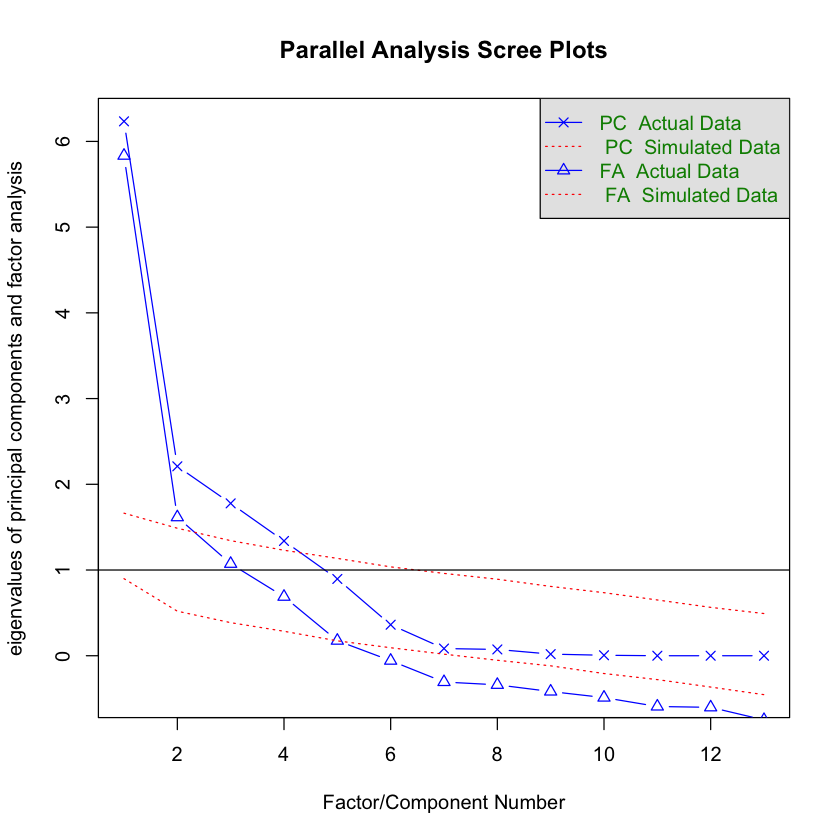

In [32]:
# look at components vs eigenvalues
fa.parallel(cormat)

The PCA suggests that there are 4 significant components, and that these components explain 80% of the variance in the data. These load most (equally) heavily on probawd and awards_p, then probjour, then new_gran, and finally grantdol. I'll use these in a second model and compare the AIC to the original.

In [55]:
# second model with loadings from pca
dat_lm2 = select(dat_rank, rank, probawd, probjour, new_gran, grantdol)
lm2 = lm(rank ~ probawd + probjour + new_gran + grantdol, data=dat_lm2)
summary(lm2)
cat('AIC: ',AIC(lm2))


Call:
lm(formula = rank ~ probawd + probjour + new_gran + grantdol, 
    data = dat_lm2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1591 -0.3617  0.1448  0.4302  0.5913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.858e+01  2.761e+00   6.730 0.000524 ***
probawd     -6.002e-01  6.593e-02  -9.104 9.87e-05 ***
probjour    -1.577e-01  3.282e-02  -4.804 0.002988 ** 
new_gran     4.723e+00  9.204e-01   5.132 0.002153 ** 
grantdol    -7.911e-06  1.385e-06  -5.712 0.001246 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.758 on 6 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9431 
F-statistic: 42.41 on 4 and 6 DF,  p-value: 0.0001554


AIC:  30.45247

In [56]:
# run stepAIC on this model as well to check if we can further reduce dimesions.
step.model2 = stepAIC(lm2, direction = 'both', trace=FALSE)
summary(step.model2)
cat('AIC: ',AIC(step.model2))


Call:
lm(formula = rank ~ probawd + probjour + new_gran + grantdol, 
    data = dat_lm2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1591 -0.3617  0.1448  0.4302  0.5913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.858e+01  2.761e+00   6.730 0.000524 ***
probawd     -6.002e-01  6.593e-02  -9.104 9.87e-05 ***
probjour    -1.577e-01  3.282e-02  -4.804 0.002988 ** 
new_gran     4.723e+00  9.204e-01   5.132 0.002153 ** 
grantdol    -7.911e-06  1.385e-06  -5.712 0.001246 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.758 on 6 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9431 
F-statistic: 42.41 on 4 and 6 DF,  p-value: 0.0001554


AIC:  30.45247

The best model for predicting the rank of institutions was found using PCA to identify 4 principle componenets and the variables on which they most strongly load. This model included probawd, probjour, new_gran, and grantdol and had the lowest AIC of any model attempted, including one with a greater number of variables hand chosen based on the correlation matrix of the original data. All 4 variables are significant predictors of rank and stepAIC does not further eliminate any of these variables. Interestingly, new_gran and grantdol are somewhat highly correlated (~0.6), but both significantly contribute to the rank. Overally, it seems the rankings are most heavily based on awards, journal articles, and grants.

I will now use this refined model to see how well these variables explain Ivy vs. not.

In [76]:
# test full model on ivy information
ivy = c(1,1,0,0,1,0,1,0,1,0,0)
dat_lm2 = select(dat_rank, rank, probawd, probjour, new_gran, grantdol)
dat_lm2$ivy = ivy

lm2 = lm(rank ~ probawd + probjour + new_gran + grantdol + ivy, data=dat_lm2)
summary(lm2)
cat('AIC: ',AIC(lm2))


Call:
lm(formula = rank ~ probawd + probjour + new_gran + grantdol + 
    ivy, data = dat_lm2)

Residuals:
       1        2        3        4        5        6        7        8 
 0.23580 -0.33595 -0.08116 -0.91737  0.63599 -0.16232  0.36754  0.51160 
       9       10       11 
-0.90337  0.40699  0.24226 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.692e+01  3.237e+00   5.228 0.003387 ** 
probawd     -5.889e-01  6.707e-02  -8.780 0.000318 ***
probjour    -1.413e-01  3.685e-02  -3.834 0.012203 *  
new_gran     5.175e+00  1.030e+00   5.026 0.004014 ** 
grantdol    -8.369e-06  1.463e-06  -5.719 0.002285 ** 
ivy         -6.309e-01  6.391e-01  -0.987 0.368846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7596 on 5 degrees of freedom
Multiple R-squared:  0.9714,	Adjusted R-squared:  0.9428 
F-statistic: 33.98 on 5 and 5 DF,  p-value: 0.0007278


AIC:  30.4934

In [77]:
# run stepAIC on this model as well to check if we can further reduce dimesions.
step.model2 = stepAIC(lm2, direction = 'both', trace=FALSE)
summary(step.model2)
cat('AIC: ',AIC(step.model2))


Call:
lm(formula = rank ~ probawd + probjour + new_gran + grantdol, 
    data = dat_lm2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1591 -0.3617  0.1448  0.4302  0.5913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.858e+01  2.761e+00   6.730 0.000524 ***
probawd     -6.002e-01  6.593e-02  -9.104 9.87e-05 ***
probjour    -1.577e-01  3.282e-02  -4.804 0.002988 ** 
new_gran     4.723e+00  9.204e-01   5.132 0.002153 ** 
grantdol    -7.911e-06  1.385e-06  -5.712 0.001246 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.758 on 6 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9431 
F-statistic: 42.41 on 4 and 6 DF,  p-value: 0.0001554


AIC:  30.45247

In [74]:
dat_lm2

probawd,probjour,new_gran,grantdol,ivy
13,96,2.30,742464,1
7,86,1.70,774609,1
3,87,2.20,1334717,0
3,94,1.19,372599,0
3,97,1.83,708448,1
4,77,1.69,749611,0
0,95,1.79,657506,1
2,73,1.18,484033,0
0,83,2.25,753668,1
0,81,1.71,565984,0


In [66]:
# test full model on ivy information
ivy = c(1,1,0,0,1,0,1,0,1,0,0)
dat_lm2 = select(dat_rank, rank, probawd, probjour, new_gran, grantdol)

dat_lm2$ivy = ivy
dat_lm2 = dat_lm2[,2:6]

# Fit the  model
ivy_model <- glm(ivy ~ probawd + probjour + new_gran + grantdol, data = dat_lm2, family = binomial)
# Summarize the final selected model
summary(ivy_model)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = ivy ~ probawd + probjour + new_gran + grantdol, 
    family = binomial, data = dat_lm2)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.395e-05  -4.197e-06  -2.110e-08   3.604e-06   1.469e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -9.813e+02  1.310e+06  -0.001    0.999
probawd      1.602e+01  2.445e+04   0.001    0.999
probjour     7.442e+00  1.037e+04   0.001    0.999
new_gran     2.384e+02  3.346e+05   0.001    0.999
grantdol    -1.968e-04  3.305e-01  -0.001    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.5158e+01  on 10  degrees of freedom
Residual deviance: 7.8265e-10  on  6  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


In [67]:
cor(ivy, dat_rank$rank)

[1] -0.3342779

In [70]:
ivyrank = lm(ivy ~ dat_rank$rank)
summary(ivyrank)


Call:
lm(formula = ivy ~ dat_rank$rank)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6144 -0.3946 -0.2297  0.4131  0.7153 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.77928    0.34294   2.272   0.0492 *
dat_rank$rank -0.05495    0.05165  -1.064   0.3150  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5188 on 9 degrees of freedom
Multiple R-squared:  0.1117,	Adjusted R-squared:  0.01305 
F-statistic: 1.132 on 1 and 9 DF,  p-value: 0.315


The logistic model did not show any of the most explanatory variables to predict ivy status. This is somewhat unsurprising given such a small sample and the fact that there seems to be an even distriubtion of ivy leagues and non-ivy leagues. Further, ivy league is not significantly predicted by rank. However, one a priori hypothesis we might have about ivy leagues is that they are so prestigious because they are old, have a lot of money, and are therefore able to hire faculty who bring in even more money. Let's run one more test to see if grant dollars can predict ivy league status

In [72]:
ivy_dol = lm(ivy ~ grantdol, data= dat_lm2)
summary(ivy_dol)


Call:
lm(formula = ivy ~ grantdol, data = dat_lm2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5341 -0.4439 -0.4111  0.5409  0.5525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 3.635e-01  5.368e-01   0.677    0.515
grantdol    1.278e-07  7.168e-07   0.178    0.862

Residual standard error: 0.5495 on 9 degrees of freedom
Multiple R-squared:  0.003519,	Adjusted R-squared:  -0.1072 
F-statistic: 0.03178 on 1 and 9 DF,  p-value: 0.8624


From this final test I would conclude that there does not seem to be an important role of ivy league vs. not in determining both school rank and grant dollars. After using PCA to determine the most explanatory variables, all variables were found to be significant predictors of rank. However, when ivy status was included in the model, ivy was found not to be significant, and stepAIC removed the ivy variables from the model to improve AIC. 

#### 2.) I briefly analyzed some of Alex daSilva’s data in class but I’ve changed the file and the questions addressed to some extent. During his experiment subjects observed a large number of different stimuli that differed in valence (positive, negative, or neutral) and presence of people (social or nonsocial). After the experiment, subjects were tested on their memory for the stimuli using a yes/no format for answering. A response of ‘1’ indicates a correct answer in the variable “response”. Alex also recorded reaction times in msec (RT). He believed that stimuli that were both negative and social would differ from the other five possible combinations. He measured self-esteem (se) and thought that might exacerbate the distinctiveness of negative social stimuli. I would like you to analyze (in separate analyses) whether those hypotheses were revealed in either accuracy or in response times. The data are in ‘alex_data.csv’.

6624 / 69 subjects = 96 trials per subject

In [76]:
alex = read.csv('data_files//alex_data.csv')
dim(alex)
max(alex$subject)
head(alex)

[1] 6624    6

[1] 69

subject,rt,stim,se,category,response
1,3284,7041.jpg,102,NeutralNonsocial,1
1,2599,9421.jpg,102,NegativeSocial,1
1,1682,8420.jpg,102,PositiveSocial,1
1,1549,2104.jpg,102,NeutralSocial,1
1,2577,2091.jpg,102,PositiveSocial,1
1,1385,2050.jpg,102,PositiveSocial,1


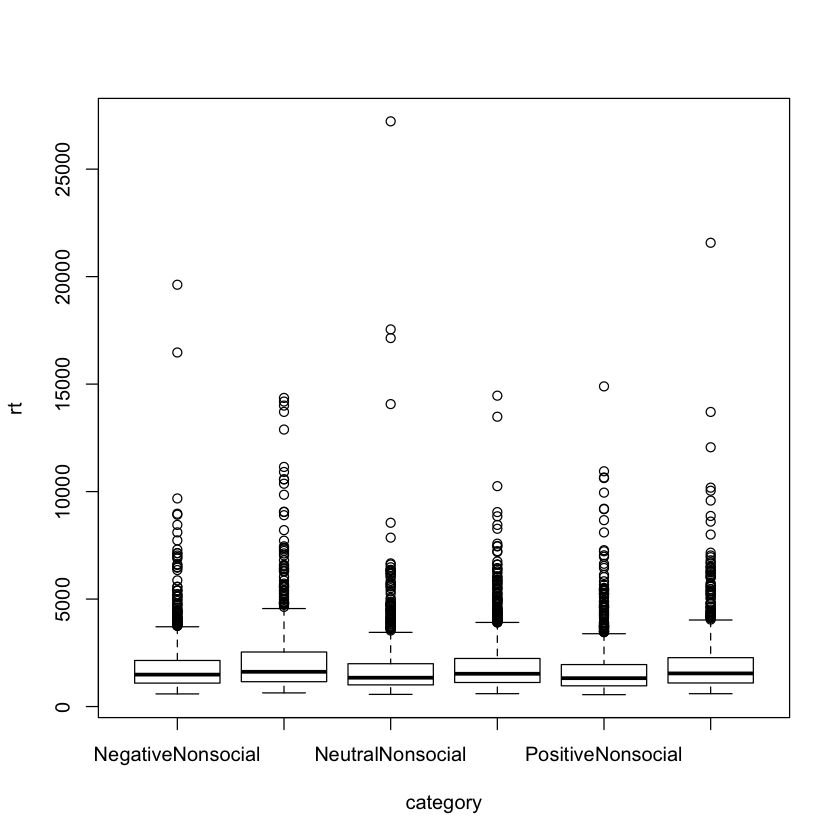

In [77]:
boxplot(rt ~ category, data=alex)

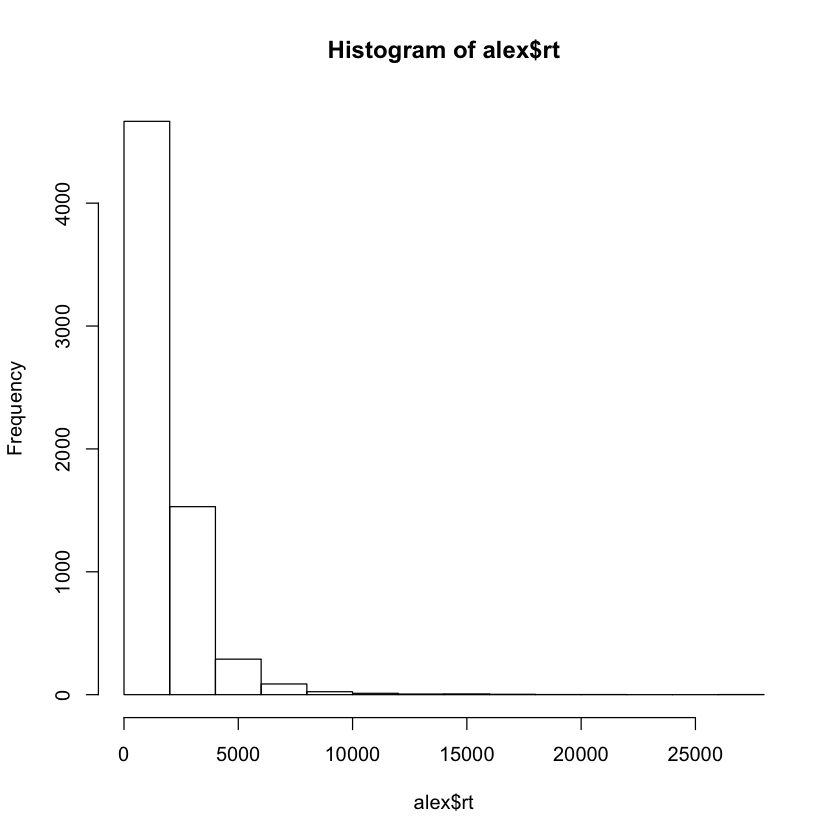

In [78]:
hist(alex$rt)

In [79]:
aggregate(alex$response ~ alex$category, FUN=sum)
aggregate(alex$response ~ alex$category, FUN=mean)
aggregate(alex$response ~ alex$category, FUN=var)

alex$category,alex$response
NegativeNonsocial,990
NegativeSocial,1016
NeutralNonsocial,981
NeutralSocial,953
PositiveNonsocial,1013
PositiveSocial,967


alex$category,alex$response
NegativeNonsocial,0.8967391
NegativeSocial,0.9202899
NeutralNonsocial,0.8885870
NeutralSocial,0.8632246
PositiveNonsocial,0.9175725
PositiveSocial,0.8759058


alex$category,alex$response
NegativeNonsocial,0.09268201
NegativeSocial,0.07342294
NeutralNonsocial,0.09908993
NeutralSocial,0.11817491
PositiveNonsocial,0.07570181
PositiveSocial,0.10879338


In [80]:
aggregate(alex$rt ~ alex$category, FUN=sum)
aggregate(alex$rt ~ alex$category, FUN=mean)
aggregate(alex$rt ~ alex$category, FUN=var)

alex$category,alex$rt
NegativeNonsocial,2052206
NegativeSocial,2341270
NeutralNonsocial,1949742
NeutralSocial,2152566
PositiveNonsocial,1894717
PositiveSocial,2145501


alex$category,alex$rt
NegativeNonsocial,1858.882
NegativeSocial,2120.716
NeutralNonsocial,1766.071
NeutralSocial,1949.788
PositiveNonsocial,1716.229
PositiveSocial,1943.389


alex$category,alex$rt
NegativeNonsocial,1830892
NegativeSocial,2624280
NeutralNonsocial,2373915
NeutralSocial,1844711
PositiveNonsocial,1730569
PositiveSocial,2123441


In [81]:
head(alex)

subject,rt,stim,se,category,response
1,3284,7041.jpg,102,NeutralNonsocial,1
1,2599,9421.jpg,102,NegativeSocial,1
1,1682,8420.jpg,102,PositiveSocial,1
1,1549,2104.jpg,102,NeutralSocial,1
1,2577,2091.jpg,102,PositiveSocial,1
1,1385,2050.jpg,102,PositiveSocial,1


From these summary statistics we can see that reaction time is positively skewed, and that the negative social cue seems to have slightly higher reaction times, although it isn't obviously different from the plot. Further, the negative social cue had the most correct responses of any group. There is not obvious systematic relationship between means and variances, though response is a binary variable.

In [102]:
# set contrast for negsoc vs all
negsoc = c(-.20, 1, -.20, -.20, -.20, -.20)
contrasts(alex$category) = negsoc

##### Hypothesis 1: negative + social differ from other 5 stimuli types in accuracy

In [103]:
hyp1= lmer(response ~ category * scale(se) + scale(rt) + (1|subject) + (1|stim), data=alex, REML = FALSE)
summary(hyp1)
AIC(hyp1)


Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: response ~ category * scale(se) + scale(rt) + (1 | subject) +  
    (1 | stim)
   Data: alex

     AIC      BIC   logLik deviance df.resid 
  2830.1   2938.9  -1399.0   2798.1     6608 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4092  0.0615  0.2578  0.4587  2.5476 

Random effects:
 Groups   Name        Variance Std.Dev.
 stim     (Intercept) 0.003261 0.05711 
 subject  (Intercept) 0.004094 0.06398 
 Residual             0.086137 0.29349 
Number of obs: 6624, groups:  stim, 96; subject, 69

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          8.937e-01  1.031e-02  1.135e+02  86.680   <2e-16 ***
category1            3.244e-02  1.534e-02  9.598e+01   2.115    0.037 *  
category2           -4.568e-03  1.679e-02  9.569e+01  -0.272    0.786    
category3           -2.520e-02  1.679e-02  9.571e+01  -1.501

[1] 2830.079

In [110]:
# since response is a binary variable, i'm going to use a glmer to model it with a binomial family for response
hyp1_glmer= glmer(response ~ category * scale(se) + scale(rt) + (1|subject) + (1|stim), data=alex, family=binomial())
summary(hyp1_glmer)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00204931 (tol = 0.002, component 1)”
Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: response ~ category * scale(se) + scale(rt) + (1 | subject) +  
    (1 | stim)
   Data: alex

     AIC      BIC   logLik deviance df.resid 
  4141.5   4243.5  -2055.8   4111.5     6609 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6828  0.1738  0.2561  0.3593  4.5811 

Random effects:
 Groups  Name        Variance Std.Dev.
 stim    (Intercept) 0.4478   0.6691  
 subject (Intercept) 0.6040   0.7772  
Number of obs: 6624, groups:  stim, 96; subject, 69

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.549169   0.128526  19.834   <2e-16 ***
category1            0.389167   0.187575   2.075   0.0380 *  
category2           -0.061223   0.198083  -0.309   0.7573    
category3           -0.273806   0.195056  -1.404   0.1604    
category4            0.281372   0.203240   1.384   0.1662    
catego

In [105]:
anova(hyp1, hyp1_glmer)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
hyp1_glmer,15,4141.519,4243.496,-2055.760,4111.519,NA,NA,NA
hyp1,16,2830.079,2938.854,-1399.039,2798.079,1313.441,1,1.356503e-287


##### Reaction Time


Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( log )
Formula: rt ~ category * scale(se) + response + (1 | subject) + (1 | stim)
   Data: alex

     AIC      BIC   logLik deviance df.resid 
106784.2 106893.0 -53376.1 106752.2     6608 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2192 -0.5725 -0.2620  0.2623 25.2580 

Random effects:
 Groups   Name        Variance Std.Dev.
 stim     (Intercept) 0.01845  0.1358  
 subject  (Intercept) 0.04082  0.2021  
 Residual             0.33034  0.5748  
Number of obs: 6624, groups:  stim, 96; subject, 69

Fixed effects:
                     Estimate Std. Error t value Pr(>|z|)    
(Intercept)          7.679325   0.048204 159.308  < 2e-16 ***
category1            0.108605   0.044971   2.415  0.01573 *  
category2           -0.054150   0.049247  -1.100  0.27152    
category3            0.044195   0.049249   0.897  0.36952    
category4           -0.063591   0.049244  -

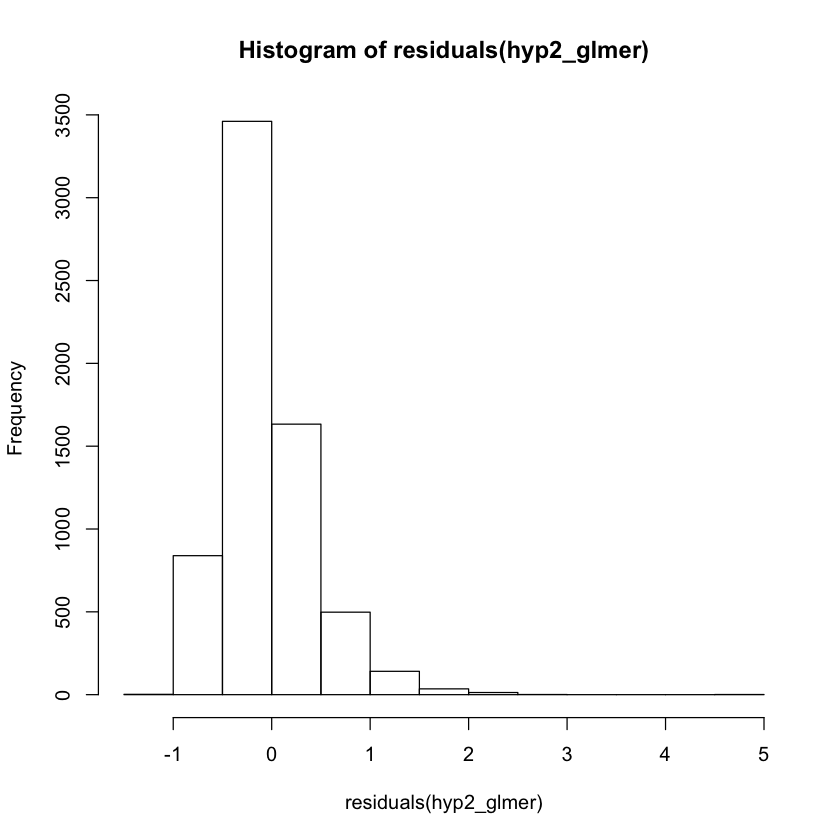

In [109]:
# reaction time is positively skewed, so I will use a Gamma link function
hyp2_glmer= glmer(rt ~ category  scale(se) + response + (1|subject) + (1|stim), data=alex, family=Gamma(link = log))
summary(hyp2_glmer)
hist(residuals(hyp2_glmer))

#####  Andrea Robinson has been conducting research on the effect of exercise on ADHD (attention deficit hyperactivity disorder).  The hypothesis is that regular exercise might ameliorate some of the deficits associated with ADHD.  She and her colleagues ran an experiment with three types of rats: WKY rats are normal controls (who weren’t given exercise opportunities); SHR.NX rats who were genetically modified to exhibit ADHD (and who weren’t given exercise); and SHR.X rats who were the genetically modified strain but were given exercise prior to each test.  The task was to learn a conditioned association between light and food.  Each rat was run for 10 days, bigger numbers indicate better learning.  The hypotheses were that the ADHD rats would show worse learning than controls but exercise would reduce or eliminate the difference.  Finally, the female altered rats typically exhibit stronger symptoms than the male rats.  Evaluate the various hypotheses.  The data are in ‘adhd_for_class.csv’

In [111]:
rats = read.csv('data_files//adhd_for_class.csv')
dim(rats)
head(rats)

[1] 48 12

Gender,Group,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
1,1,0.000,1.330,2.500,3.166,4.166,4.833,3.166,3.166,3.5000,3.500
1,1,2.500,1.833,1.000,1.833,2.666,2.333,3.500,3.833,4.1666,1.833
1,1,0.333,3.330,3.333,3.833,4.000,3.500,3.330,2.000,3.6660,3.000
1,1,0.000,1.000,0.833,2.166,4.500,3.833,6.000,5.666,5.6660,5.166
1,1,0.000,0.666,2.330,2.500,2.166,2.166,3.166,2.500,3.8330,3.833
1,1,0.333,2.333,2.166,2.666,4.333,4.330,3.330,4.166,3.3330,2.666


In [112]:
# add subject ID
rats$subject = c(1:48)
head(rats)

Gender,Group,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,subject
1,1,0.000,1.330,2.500,3.166,4.166,4.833,3.166,3.166,3.5000,3.500,1
1,1,2.500,1.833,1.000,1.833,2.666,2.333,3.500,3.833,4.1666,1.833,2
1,1,0.333,3.330,3.333,3.833,4.000,3.500,3.330,2.000,3.6660,3.000,3
1,1,0.000,1.000,0.833,2.166,4.500,3.833,6.000,5.666,5.6660,5.166,4
1,1,0.000,0.666,2.330,2.500,2.166,2.166,3.166,2.500,3.8330,3.833,5
1,1,0.333,2.333,2.166,2.666,4.333,4.330,3.330,4.166,3.3330,2.666,6


In [113]:
# check variance and correlations across time points
var(rats[,3:12])
cor(rats[,3:12])


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
t1,0.241377230,0.01381487,-0.06968783,-0.05741521,-0.09537342,-0.05185245,-0.0399780,0.009272314,-0.07321191,-0.07517186
t2,0.013814872,0.58944139,0.48287189,0.42224250,0.43247402,0.32305243,0.3085016,-0.021009926,0.18567168,0.12133305
t3,-0.069687831,0.48287189,1.06971488,0.83611401,0.75985675,0.69310073,0.6184635,0.112021334,0.43235298,0.32624583
t4,-0.057415214,0.42224250,0.83611401,1.28002309,1.25310911,1.21690190,1.1014962,0.582434594,0.82346448,0.65435388
t5,-0.095373420,0.43247402,0.75985675,1.25310911,1.88856582,1.58693847,1.4708089,0.958001382,1.31089347,1.16644455
t6,-0.051852450,0.32305243,0.69310073,1.21690190,1.58693847,1.85284932,1.4322364,0.991143542,1.07634497,0.88445089
t7,-0.039977996,0.30850163,0.61846355,1.10149616,1.47080889,1.43223641,2.0503830,1.399754641,1.65429975,1.51129077
t8,0.009272314,-0.02100993,0.11202133,0.58243459,0.95800138,0.99114354,1.3997546,2.054453218,1.68706568,1.40720017
t9,-0.073211905,0.18567168,0.43235298,0.82346448,1.31089347,1.07634497,1.6542998,1.687065678,2.61430130,2.28699054
t10,-0.075171860,0.12133305,0.32624583,0.65435388,1.16644455,0.88445089,1.5112908,1.407200167,2.28699054,2.63210428


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
t1,1.00000000,0.03662507,-0.13714336,-0.1032928,-0.1412580,-0.07753559,-0.05682708,0.01316715,-0.09216282,-0.09430953
t2,0.03662507,1.00000000,0.60810362,0.4861080,0.4098960,0.30912394,0.28062067,-0.01909220,0.14957105,0.09741083
t3,-0.13714336,0.60810362,1.00000000,0.7145335,0.5346033,0.49231411,0.41760203,0.07556464,0.25853933,0.19442827
t4,-0.10329277,0.48610796,0.71453348,1.0000000,0.8059608,0.79018106,0.67991808,0.35916179,0.45015093,0.35649401
t5,-0.14125803,0.40989596,0.53460331,0.8059608,1.0000000,0.84834787,0.74743372,0.48635339,0.58996129,0.52317440
t6,-0.07753559,0.30912394,0.49231411,0.7901811,0.8483479,1.00000000,0.73481356,0.50800545,0.48905040,0.40049964
t7,-0.05682708,0.28062067,0.41760203,0.6799181,0.7474337,0.73481356,1.00000000,0.68200301,0.71452741,0.65054747
t8,0.01316715,-0.01909220,0.07556464,0.3591618,0.4863534,0.50800545,0.68200301,1.00000000,0.72795753,0.60514048
t9,-0.09216282,0.14957105,0.25853933,0.4501509,0.5899613,0.48905040,0.71452741,0.72795753,1.00000000,0.87183641
t10,-0.09430953,0.09741083,0.19442827,0.3564940,0.5231744,0.40049964,0.65054747,0.60514048,0.87183641,1.00000000


In [114]:
# create long data frame from wide one. change t1-t10 to 1-10
rats_long = gather(rats, time, learning, t1:t10)
head(rats_long)

rats_long$time <- mapvalues(rats_long$time, 
          from=c("t1","t2","t3", "t4", "t5", "t6", "t7", "t8", "t9","t10"), 
          to=c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
rats_long$time = as.numeric(rats_long$time)
head(rats_long)

Gender,Group,subject,time,learning
1,1,1,t1,0.000
1,1,2,t1,2.500
1,1,3,t1,0.333
1,1,4,t1,0.000
1,1,5,t1,0.000
1,1,6,t1,0.333


Gender,Group,subject,time,learning
1,1,1,1,0.000
1,1,2,1,2.500
1,1,3,1,0.333
1,1,4,1,0.000
1,1,5,1,0.000
1,1,6,1,0.333


[1] 480   5

[1] 480   5

time,learning
1,0.5485625
2,0.9093333
3,1.3431313
4,2.0691167
5,2.5135688
6,2.7322500
7,3.1244708
8,3.0864271
9,3.9232125
10,3.6803042


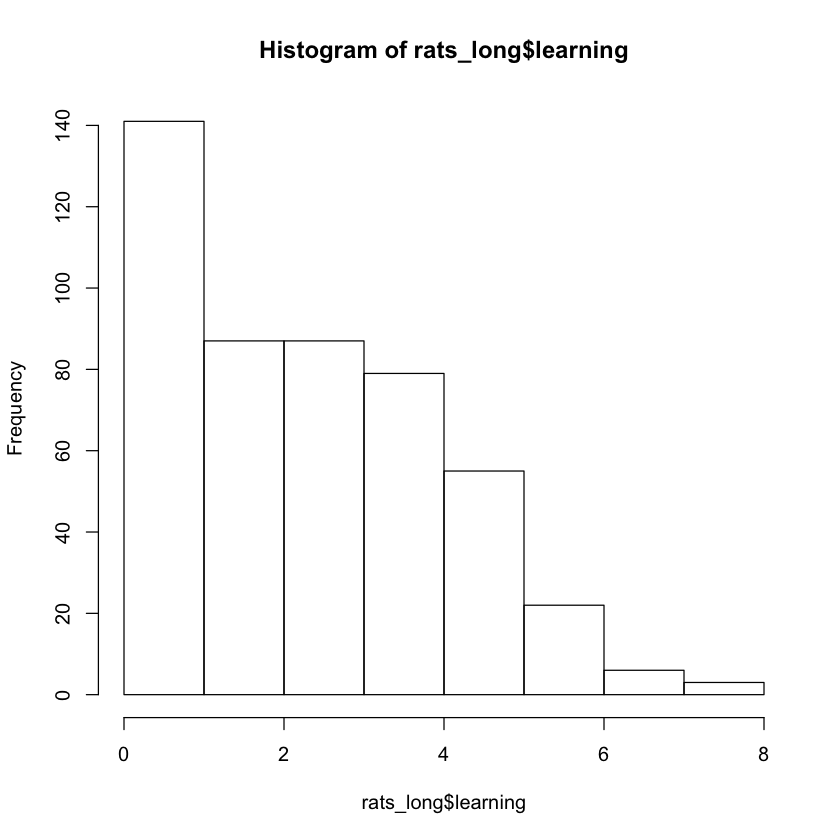

In [115]:
# check dimensions if missing data omitted
rats_na = na.omit(rats_long)
dim(rats_long)
dim(rats_na)
aggregate(learning~time, data=rats_long, mean)
hist(rats_long$learning)

The learning variable does not seem to be normally distributed. However, I will check to see if the residuals are normally distributed to see if I need to transform.

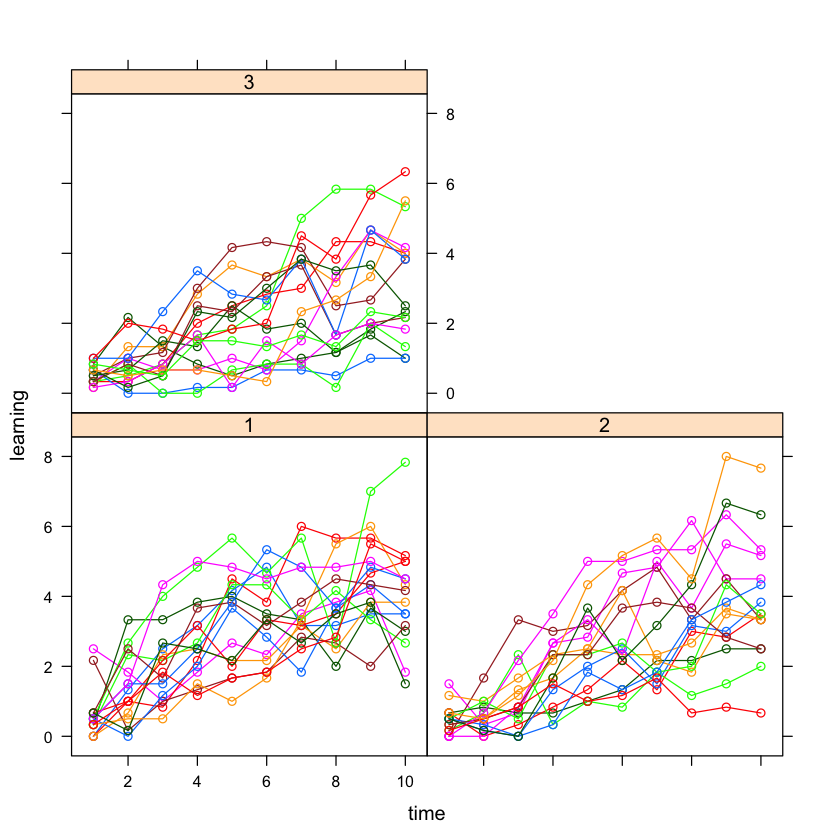

In [116]:
par(cex = .6)
xyplot(learning ~ time | as.factor(Group), data = rats_long, groups=subject,
       type = "o", panel = panel.superpose)

There appear to be at least a few individuals within each group whose slopes differ from the rest of the group across time, so I will allow for random slopes of learning within subjects.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: learning ~ time + Group + Gender + (1 | subject)
   Data: rats_long

REML criterion at convergence: 1441.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.64218 -0.62637 -0.03002  0.62086  2.99572 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.5586   0.7474  
 Residual             0.9579   0.9787  
Number of obs: 480, groups:  subject, 48

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   1.00814    0.47480  48.06411   2.123  0.03891 *  
time          0.37202    0.01555 431.00000  23.920  < 2e-16 ***
Group        -0.49270    0.14300  45.00000  -3.445  0.00125 ** 
Gender        0.21611    0.23352  45.00000   0.925  0.35967    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr) time   Group 
time   -0.180              
Group  -0.602  0.0

[1] 1453.821

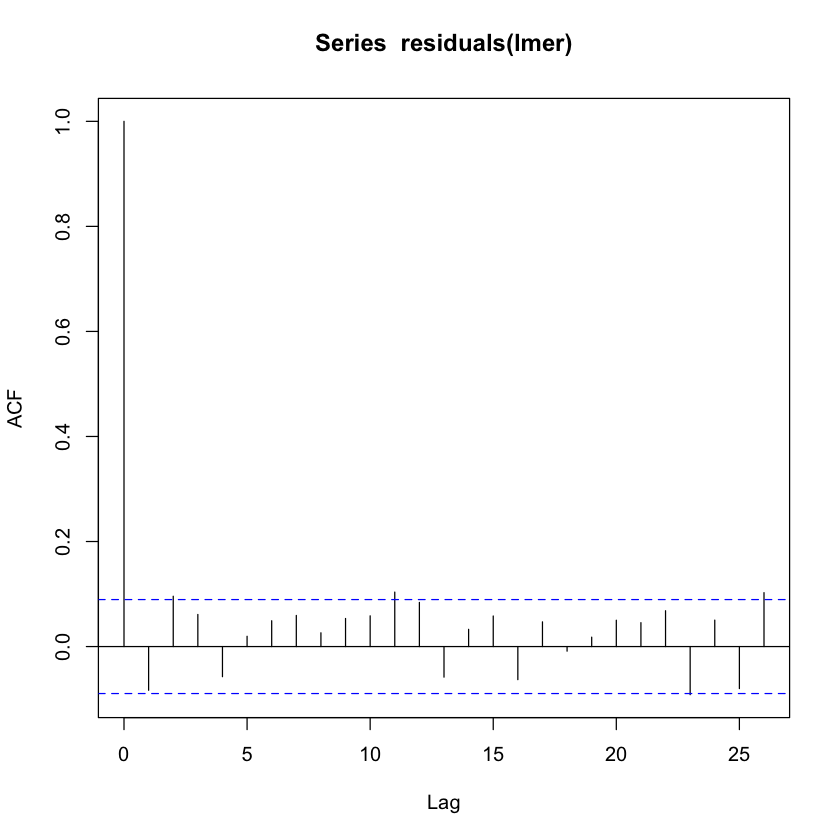

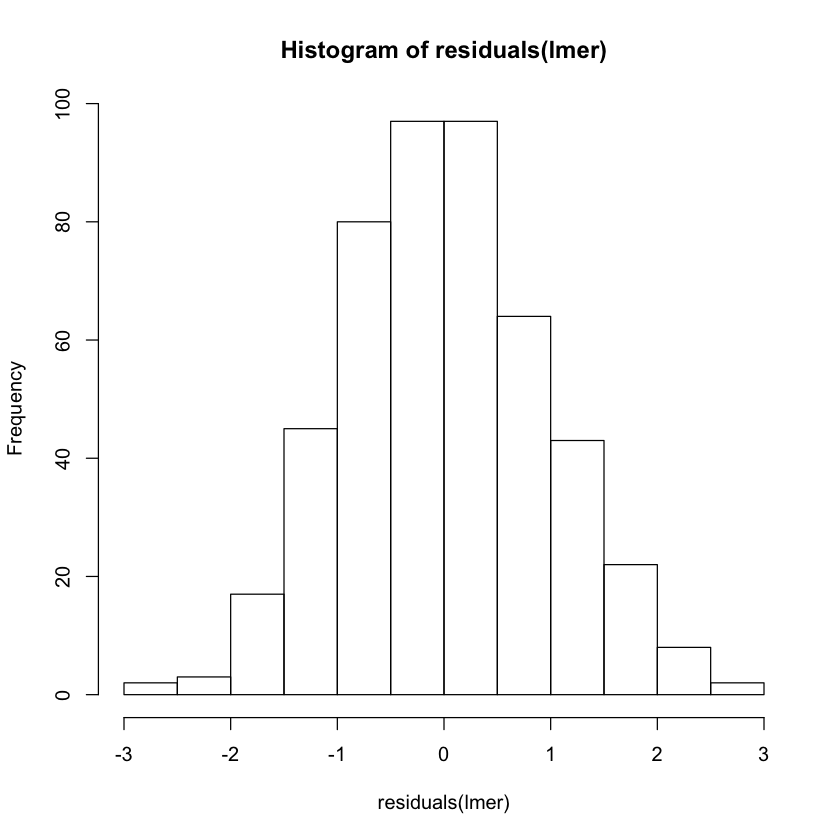

In [127]:
# run lmer 
lmer = lmer(learning ~ time + Group + Gender + (1 | subject), data = rats_long)
summary(lmer)
AIC(lmer)
acf(residuals(lmer))
hist(residuals(lmer))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: learning ~ time + Group + (1 + time | subject)
   Data: rats_long

REML criterion at convergence: 1338

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8043 -0.6524 -0.0482  0.6058  2.3272 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 subject  (Intercept) 0.34193  0.5847        
          time        0.03122  0.1767   -0.62
 Residual             0.67695  0.8228        
Number of obs: 480, groups:  subject, 48

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.14953    0.24141 55.09275   4.762 1.43e-05 ***
time         0.37202    0.02866 47.00034  12.980  < 2e-16 ***
Group       -0.40132    0.10556 46.00019  -3.802 0.000421 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr) time  
time  -0.328       
Group -0.875  0.000

[1] 1351.998

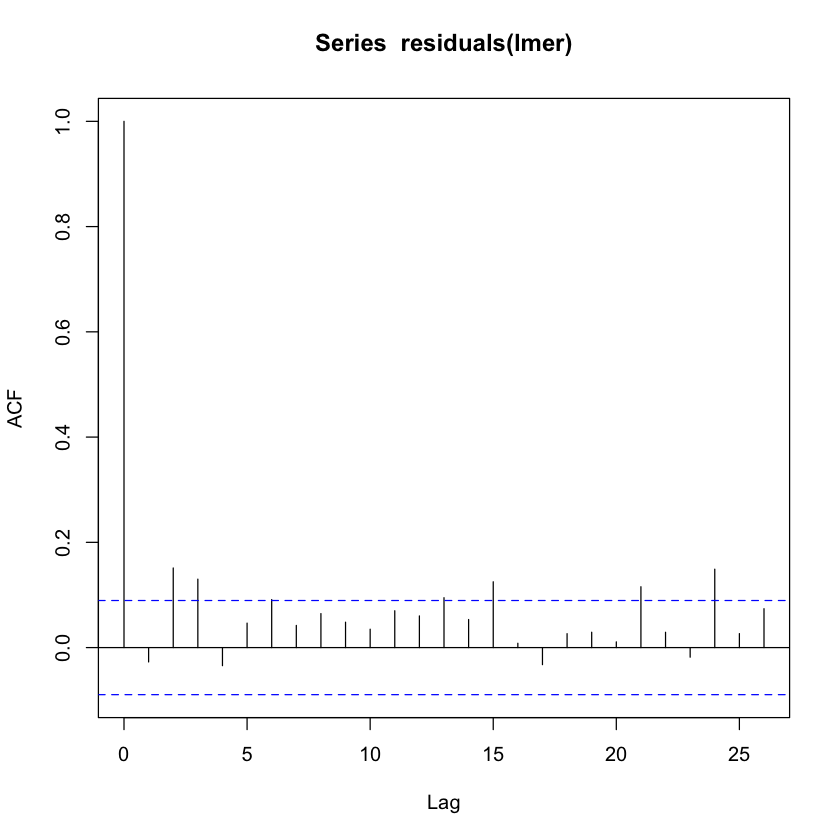

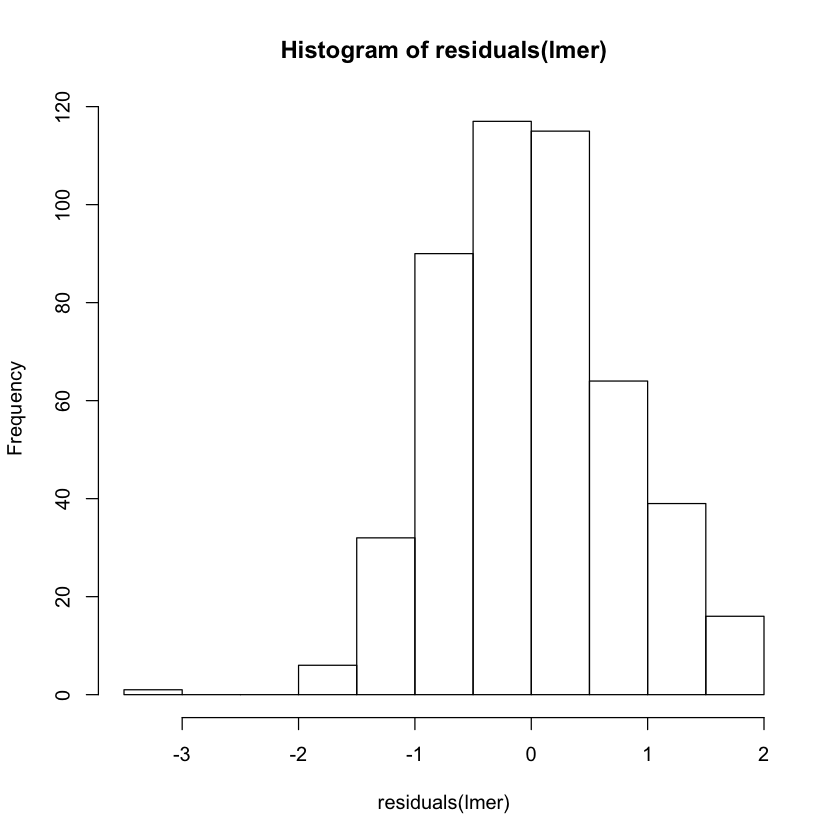

In [123]:
# run lmer 
lmer = lmer(learning ~ time + Group + (1 + time| subject), data = rats_long)
summary(lmer)
AIC(lmer)
acf(residuals(lmer))
hist(residuals(lmer))

Generalized least squares fit by maximum likelihood
  Model: learning ~ time + Group 
  Data: rats_long 
       AIC      BIC    logLik
  1290.179 1311.048 -640.0896

Correlation Structure: AR(1)
 Formula: ~1 | subject 
 Parameter estimate(s):
      Phi 
0.6849749 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept)  1.1625219 0.3213582  3.617527  0.0003
time         0.3564997 0.0268019 13.301277  0.0000
Group       -0.4073350 0.1321859 -3.081531  0.0022

 Correlation: 
      (Intr) time  
time  -0.459       
Group -0.823  0.000

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.65938489 -0.61922813 -0.04997798  0.64022364  3.63964501 

Residual standard error: 1.220902 
Degrees of freedom: 480 total; 477 residual

,numDF,F-value,p-value
(Intercept),1,13.086501,3.291604e-04
time,1,176.923981,1.469918e-34
Group,1,9.495831,2.178495e-03


[1] 1290.179

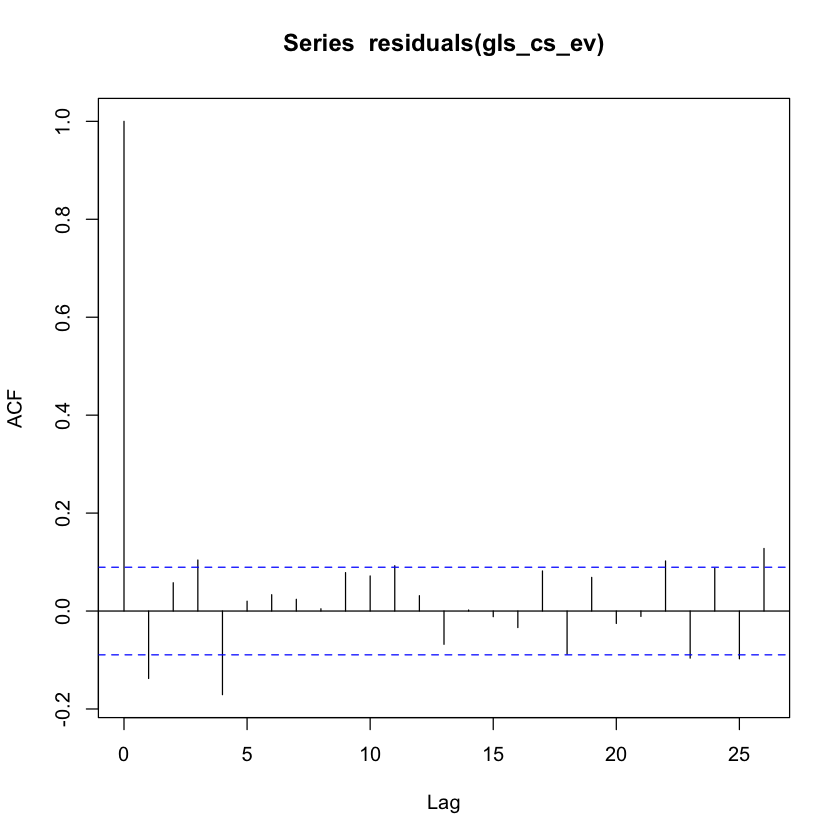

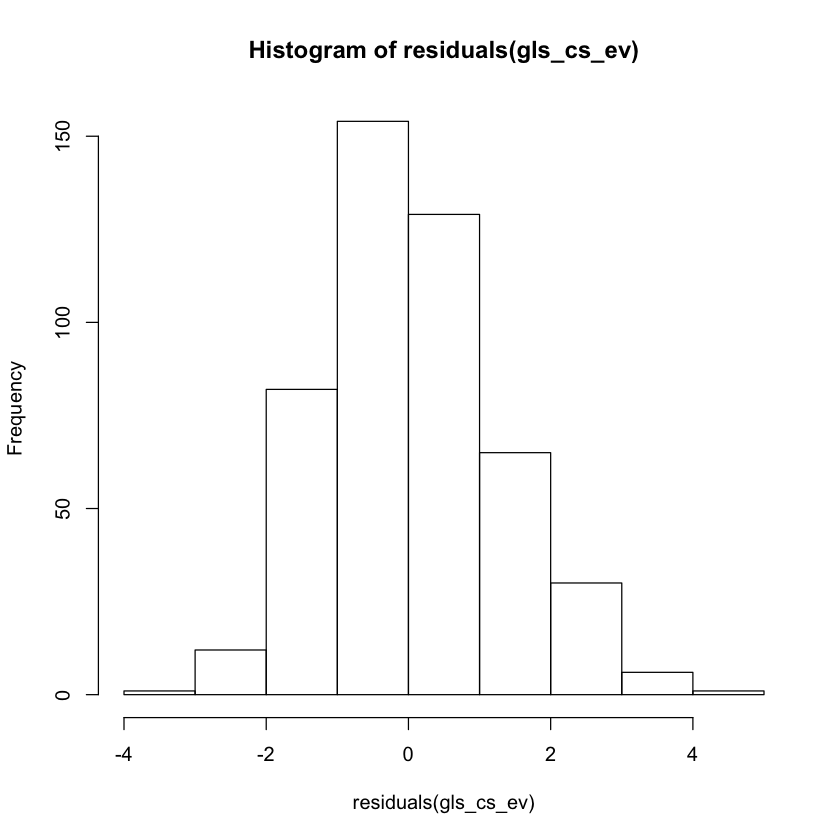

In [126]:
# will try out ar1
gls_cs_ev <- gls(learning ~ time + Group, data = rats_long, corr = corAR1(, form= ~ 1 | subject), method = "ML" )
summary(gls_cs_ev)
anova(gls_cs_ev, type = "marginal")
AIC(gls_cs_ev)
acf(residuals(gls_cs_ev))
hist(residuals(gls_cs_ev))

Generalized least squares fit by maximum likelihood
  Model: learning ~ time + Group 
  Data: rats_long 
       AIC     BIC    logLik
  1294.874 1499.39 -598.4372

Correlation Structure: General
 Formula: ~1 | subject 
 Parameter estimate(s):
 Correlation: 
   1      2      3      4      5      6      7      8      9     
2   0.665                                                        
3   0.295  0.708                                                 
4   0.130  0.496  0.721                                          
5  -0.234  0.147  0.367  0.717                                   
6  -0.073  0.180  0.389  0.730  0.806                            
7   0.055  0.240  0.360  0.635  0.662  0.685                     
8  -0.035 -0.189 -0.220  0.014  0.172  0.254  0.452              
9  -0.244 -0.141 -0.021  0.237  0.449  0.335  0.553  0.526       
10  0.125  0.139  0.124  0.174  0.278  0.202  0.460  0.415  0.672

Coefficients:
                 Value  Std.Error   t-value p-value
(Intercept)  1.

,numDF,F-value,p-value
(Intercept),1,41.56987,2.790733e-10
time,1,219.68100,3.751112e-41
Group,1,24.56960,9.975995e-07


[1] 1294.874

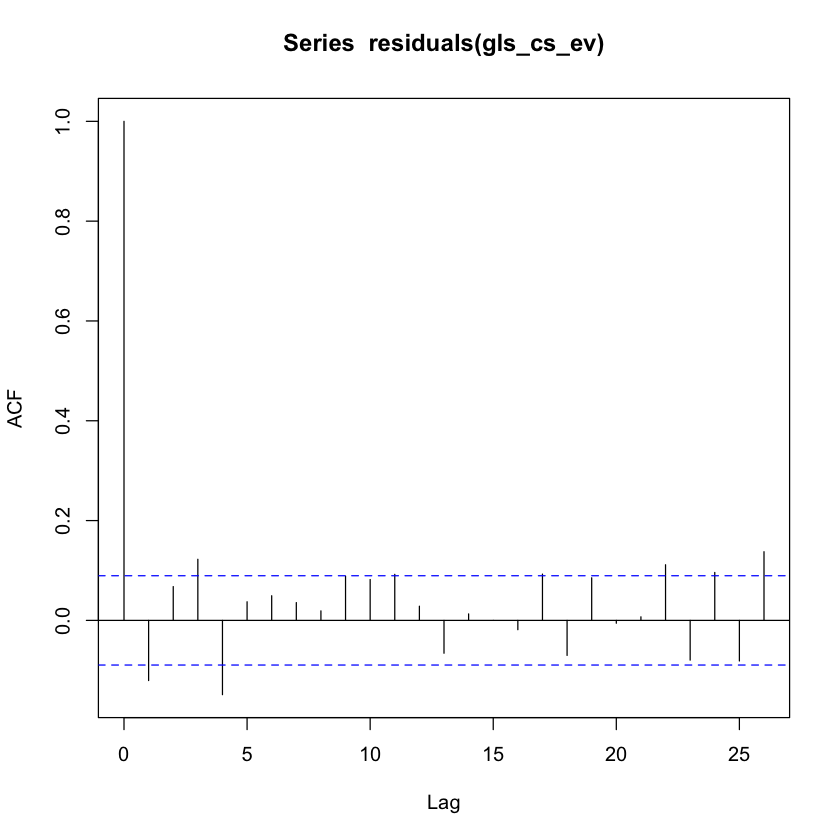

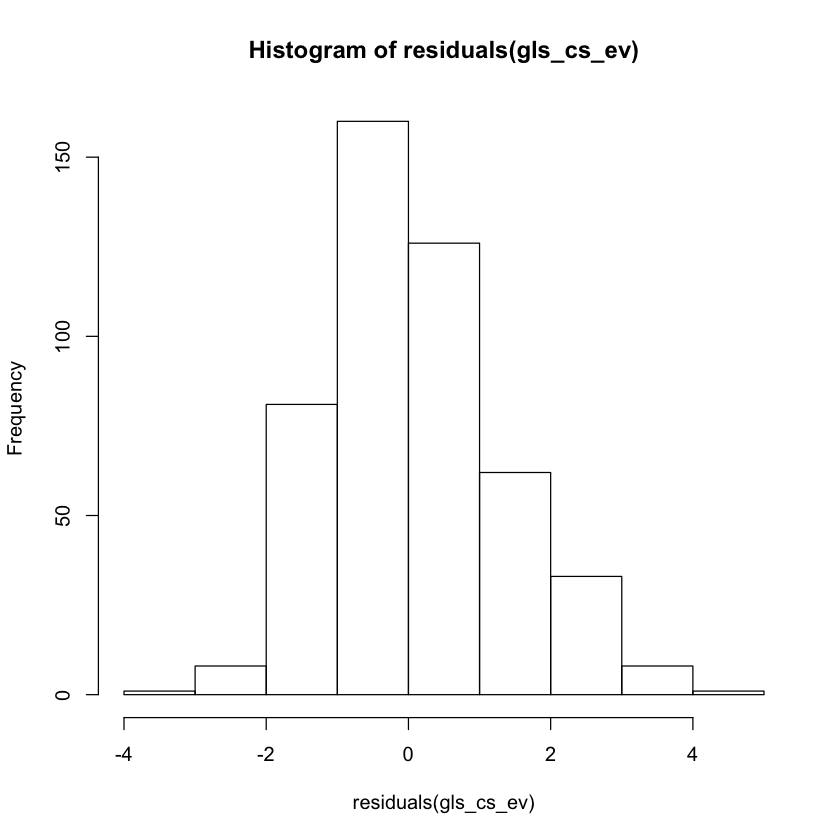

In [128]:
# will try out different parameters for each covariance but keep equal variance
gls_cs_ev <- gls(learning ~ time + Group, data = rats_long, corr=corSymm(form = ~ 1 | subject), method = "ML" )
summary(gls_cs_ev)
anova(gls_cs_ev, type = "marginal")
AIC(gls_cs_ev)
acf(residuals(gls_cs_ev))
hist(residuals(gls_cs_ev))

#### 4.) (Danielle Fournier). The behavioral paradigm is called "positive patterning" such that 3 sensory stimuli were presented in intermixed trials during each conditioning session. The 3 sensory stimuli were "L" for a flashing light, "C" for a clicking sound, and "CL" for a simultaneous presentation of the flashing light and click.

What makes this an interesting study is that the click (C) and the light (L) stimuli were nonreinforced (meaning the subjects did not get a food reward after the stimuli presentation terminated). However, the compound presentation (CL) was reinforced (subjects received 2 grain pellets as a reward).

What I measured was food cup or "magazine" entries, which was the time spent in the food cup during the cue presentations (i.e. while the flashing light was occurring how much time did the rat spent with its head in the food cup waiting for the food to drop). Training occurred over 16 days (see column "session"). What we had hoped to see was that intact rats should spend more time in the food cup during the compound presentation than the individual stimuli, because the compound was reinforced.

Intact "sham" rats are group "0" and lesioned rats are group "1".

Lesioned rats are rats that received pre-training lesions of the retrosplenial cortex (RSC). Our working hypothesis was that if the RSC was important for the integration of sensory cues, RSC lesioned animals would be impaired, thus respond similarly to all three types of cues, unlike intact rats. The data are in ‘entries_reshaped.csv’.

In [41]:
dani = read.csv('data_files//entries_reshaped.csv')
dim(dani)
head(dani)

[1] 720   5

Subject,Group,Score,Stimulus,Session
1,1,2.250,C,1
1,1,2.375,C,2
1,1,2.625,C,3
1,1,3.750,C,4
1,1,5.250,C,5
1,1,4.375,C,6


In [47]:
aggregate(Score~Stimulus, data=dani,mean)
aggregate(Score~Stimulus, data=dani[dani$Group==1,],mean)
aggregate(Score~Stimulus, data=dani[dani$Group==0,],mean)

Stimulus,Score
C,3.847396
CL,6.391927
L,2.177083


Stimulus,Score
C,4.244141
CL,6.420410
L,2.221680


Stimulus,Score
C,3.393973
CL,6.359375
L,2.126116


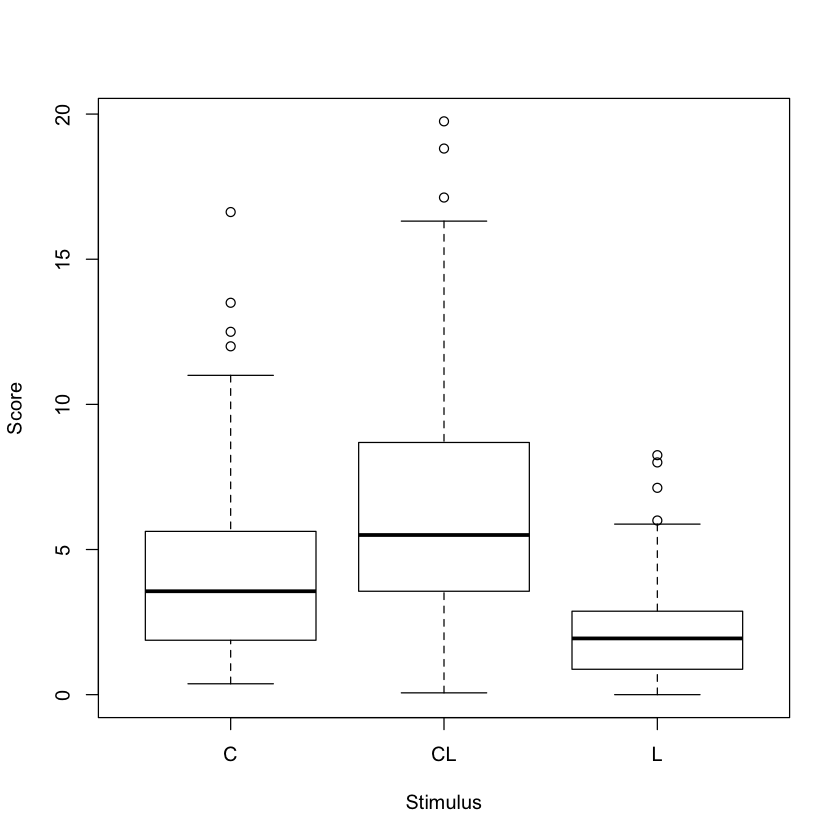

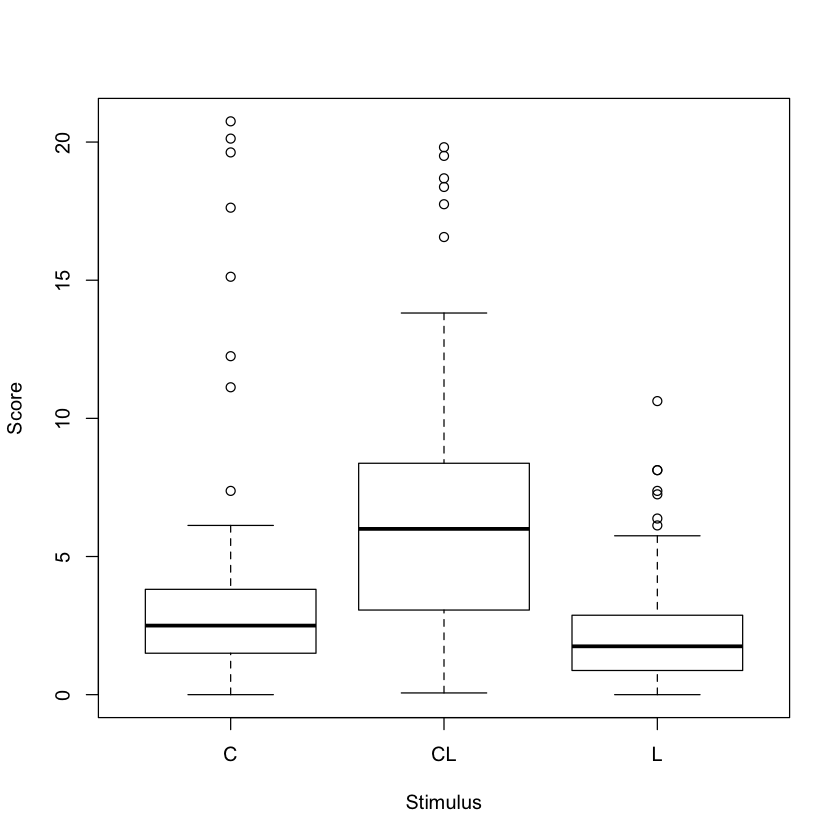

In [49]:
boxplot(Score~Stimulus, data= dani[dani$Group==1,])
boxplot(Score~Stimulus, data= dani[dani$Group==0,])

From the box plots, it looks like there may be less overlap of learning between the C and CL stimuli in the sham vs. lesioned rats. Though it isn't clear if CL vs. the rest is different between these groups. I'll include an interaction term to check for this effect.

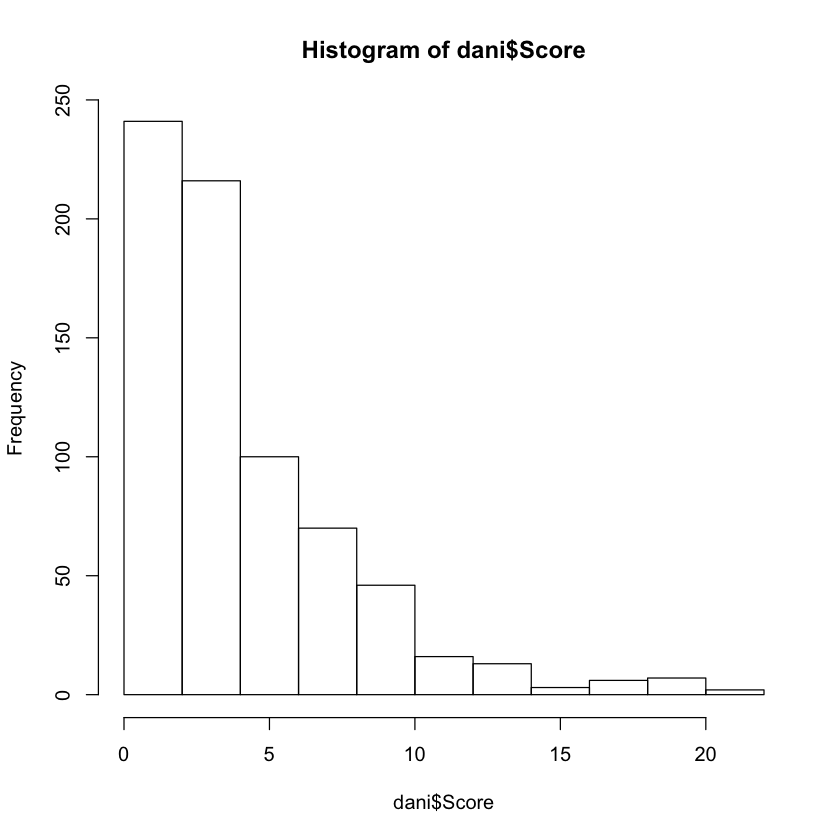

In [52]:
hist(dani$Score)

In [55]:
max(dani$Score)

[1] 20.75

In [51]:
head(dani)

Subject,Group,Score,Stimulus,Session
1,1,2.250,C,1
1,1,2.375,C,2
1,1,2.625,C,3
1,1,3.750,C,4
1,1,5.250,C,5
1,1,4.375,C,6
